---
<h1><B> Data Mining(CS5600)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment : </td>
<td><h3> 2 </td>
</tr>
<tr> 
<td><h3> Title : </td>
<td><h3> Citation Network Analysis </td>
</tr>
<tr> 
<td><h3> Team Details : </td>
<td>

<table>
<tr>
<th> <h3> Name </th>
<th> <h3> Roll Number </th>
</tr>



<tr> 
<td><h5> Deva Suvedh </td>
<td><h5> CS22BTECH11016 </td>
</tr>
<tr> 
<td><h5> Medikonda Sreekar </td>
<td><h5> CS22BTECH11037 </td>
<tr>
<td><h5> Gujjala Vignesh </td>
<td><h5> CS22BTECH11025 </td>
</tr>
<td><h5> Singa Divija Reddy </td>
<td><h5> AI22BTECH11026 </td>
</tr>
<td><h5> Nunavath Vishnu Teja </td>
<td><h5> AI22BTECH11030 </td>
</tr>

<table>



</td>
</tr>
<table>


## TASK 1

Scanning DBLP files for papers (2010–2015 with ≥60 citations)...


Scanning dblp.v10/dblp-ref/dblp-ref-0.json: 0it [00:00, ?it/s]

Scanning dblp.v10/dblp-ref/dblp-ref-0.json: 1000000it [00:05, 185367.38it/s]
Scanning dblp.v10/dblp-ref/dblp-ref-1.json: 1000000it [00:06, 166061.80it/s]
Scanning dblp.v10/dblp-ref/dblp-ref-2.json: 1000000it [00:05, 189181.08it/s]
Scanning dblp.v10/dblp-ref/dblp-ref-3.json: 79007it [00:00, 214193.34it/s]



✅ Eligible papers found: 49572

Building directed citation graph...


Processing dblp.v10/dblp-ref/dblp-ref-0.json: 1000000it [00:04, 201022.58it/s]
Processing dblp.v10/dblp-ref/dblp-ref-1.json: 1000000it [00:05, 167565.24it/s]
Processing dblp.v10/dblp-ref/dblp-ref-2.json: 1000000it [00:05, 177417.06it/s]
Processing dblp.v10/dblp-ref/dblp-ref-3.json: 79007it [00:00, 198878.06it/s]



✅ Graph construction complete!
Nodes (papers): 49572
Edges (citations): 163309

Computing connectivity statistics...

===== GRAPH STATISTICS =====
Vertices: 49572
Edges: 163309
Weakly Connected Components: 6985
Strongly Connected Components: 47731
Nodes in largest WCC: 41225
Edges in largest WCC: 161635
Nodes in largest SCC: 171
Edges in largest SCC: 1190

Visualizing a small random subgraph (100 nodes)...


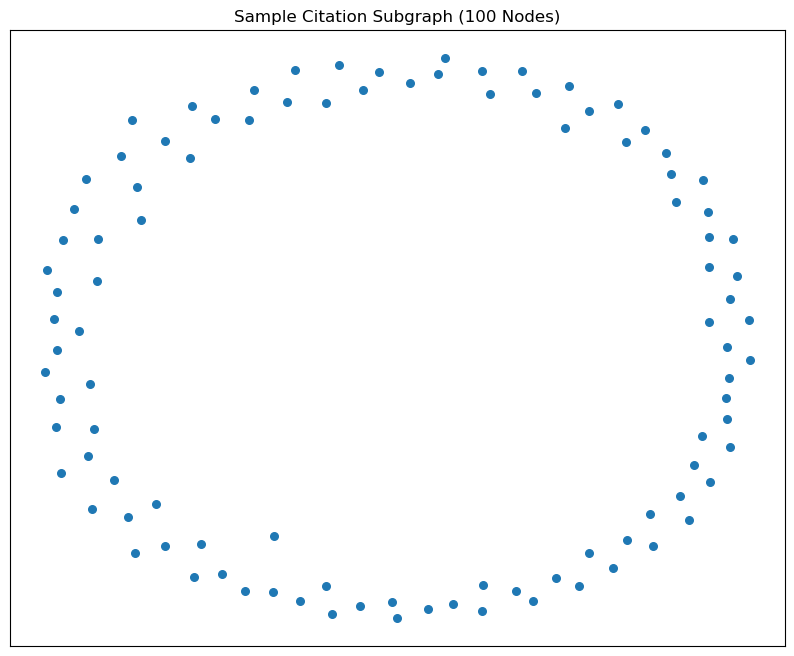


✅ Graph saved successfully as 'citation_graph_filtered.gpickle'


In [6]:
import json
import networkx as nx
from tqdm import tqdm
import glob
import random
import matplotlib.pyplot as plt

# -------------------------------
# 📂 Folder containing dblp-ref-*.json files
# -------------------------------
folder_path = "dblp.v10/dblp-ref/"
files = sorted(glob.glob(folder_path + "dblp-ref-*.json"))

# -------------------------------
# 1️⃣ Collect eligible papers
# -------------------------------
eligible_ids = set()
paper_meta = {}

print("Scanning DBLP files for papers (2010–2015 with ≥60 citations)...")
for file_path in files:
    with open(file_path, "r") as f:
        for line in tqdm(f, desc=f"Scanning {file_path}"):
            data = json.loads(line)
            year = data.get("year", 0)
            n_cit = data.get("n_citation", 0)
            if 2010 <= year <= 2015 and n_cit >= 60:
                pid = data["id"]
                eligible_ids.add(pid)
                paper_meta[pid] = {
                    "title": data.get("title", ""),
                    "n_citation": n_cit
                }

print(f"\n✅ Eligible papers found: {len(eligible_ids)}")

# -------------------------------
# 2️⃣ Build directed citation graph
# -------------------------------
G = nx.DiGraph()
G.add_nodes_from(eligible_ids)

print("\nBuilding directed citation graph...")
for file_path in files:
    with open(file_path, "r") as f:
        for line in tqdm(f, desc=f"Processing {file_path}"):
            data = json.loads(line)
            pid = data.get("id")
            if pid in eligible_ids:
                for ref in data.get("references", []):
                    if ref in eligible_ids:
                        G.add_edge(pid, ref)

print("\n✅ Graph construction complete!")
print(f"Nodes (papers): {G.number_of_nodes()}")
print(f"Edges (citations): {G.number_of_edges()}")

# -------------------------------
# 3️⃣ Compute graph statistics
# -------------------------------
print("\nComputing connectivity statistics...")
wccs = list(nx.weakly_connected_components(G))
sccs = list(nx.strongly_connected_components(G))

largest_wcc = G.subgraph(max(wccs, key=len))
largest_scc = G.subgraph(max(sccs, key=len))

stats = {
    "Vertices": G.number_of_nodes(),
    "Edges": G.number_of_edges(),
    "Weakly Connected Components": len(wccs),
    "Strongly Connected Components": len(sccs),
    "Nodes in largest WCC": largest_wcc.number_of_nodes(),
    "Edges in largest WCC": largest_wcc.number_of_edges(),
    "Nodes in largest SCC": largest_scc.number_of_nodes(),
    "Edges in largest SCC": largest_scc.number_of_edges(),
}

print("\n===== GRAPH STATISTICS =====")
for k, v in stats.items():
    print(f"{k}: {v}")

# -------------------------------
# 4️⃣ Small visualization
# -------------------------------
print("\nVisualizing a small random subgraph (100 nodes)...")
sample_nodes = random.sample(list(G.nodes()), min(100, len(G.nodes())))
H = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 8))
nx.draw_networkx(H, node_size=30, arrows=False, with_labels=False)
plt.title("Sample Citation Subgraph (100 Nodes)")
plt.show()

# -------------------------------
# 5️⃣ Save graph for later tasks (Exercises 2–4)
# -------------------------------
import pickle

with open("citation_graph_filtered.gpickle", "wb") as f:
    pickle.dump(G, f)

print("\n✅ Graph saved successfully as 'citation_graph_filtered.gpickle'")

